# Base Imports

In [1]:
import numpy as np
from utils.dataset_utils import load_dataset
from models.model_builder import generate_model_summary
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import (
    AdaBoostRegressor,
    GradientBoostingRegressor,
    RandomForestRegressor,
    VotingRegressor,
    BaggingRegressor
)

In [2]:
import warnings
warnings.simplefilter("ignore")

# Loading Dataset
The current dataset is being loaded with a StandardScaler on age, bmi and children columns and a OneHotEncoder on the region column.

In [3]:
X_train, X_test, y_train, y_test = load_dataset(
    "dataset/data.csv",
    **{
        "std_scaler": ["age", "bmi", "children"],
        # "min_max_scaler": ["age", "bmi", "children"],
        "one_hot_encoder": ["region"]
    }
)

# Building Models

# 1- LinearRegression with Ridge Regularization

In [4]:
lr_ridge = generate_model_summary(
    "lr_ridge",
    Ridge(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "ridge__alpha": [0, 5, 10, 20],
            "ridge__max_iter": [1000, 1500, 2000],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

Model Result:


MSE  R2 Score
0  Train  1.821761e+07  0.837996
1   Test  1.823147e+07  0.862191

Grid Search Best Params:


param  values
0  polynomialfeatures__degree       3
1                ridge__alpha       5
2             ridge__max_iter    1000

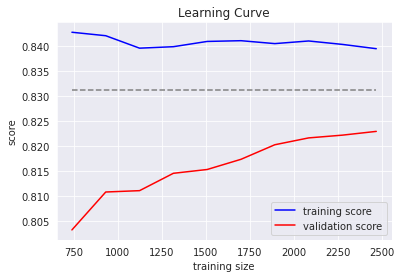

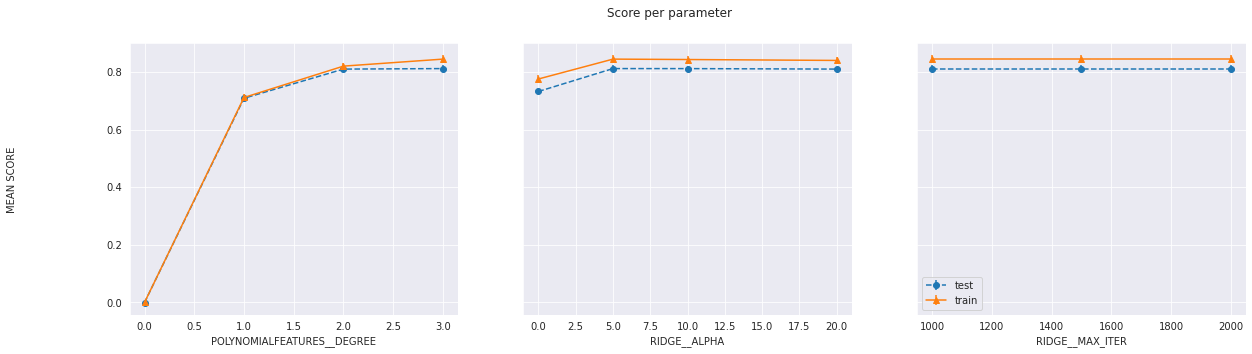

In [5]:
lr_ridge.to_json("dist/result.json")
lr_ridge.display()

# 2- LinearRegression with Ridge Regularization and RFE

In [6]:
lr_ridge_rfe = generate_model_summary(
    "lr_ridge_rfe",
    Ridge(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    rfe={
        "estimator": Ridge(),
    },
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "ridge__alpha": [0, 5, 10, 20],
            "ridge__max_iter": [1000, 1500, 2000],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },

)

Model Result:


MSE  R2 Score
0  Train  1.863082e+07  0.834322
1   Test  1.894867e+07  0.856770

Grid Search Best Params:


param  values
0  polynomialfeatures__degree       3
1                ridge__alpha      10
2             ridge__max_iter    1000

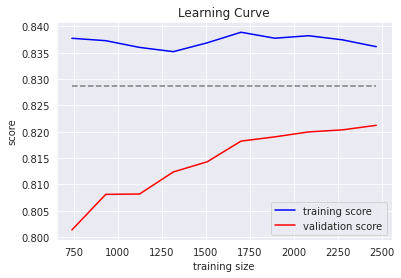

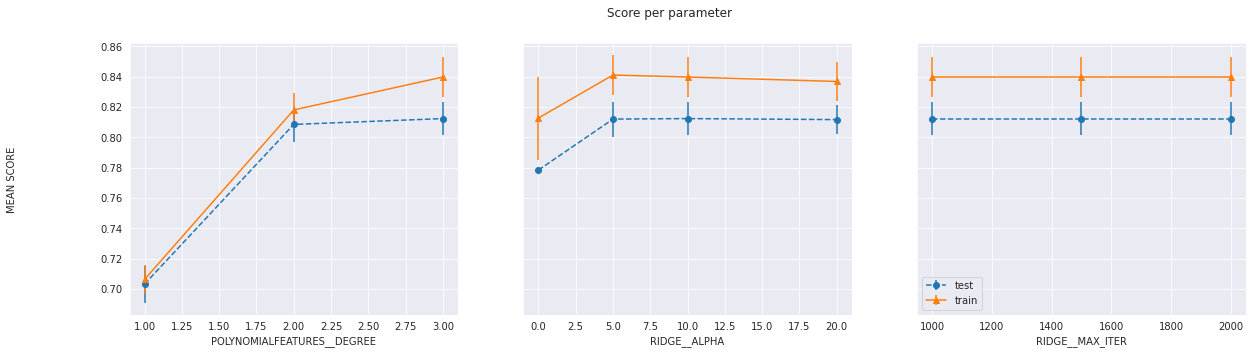

In [7]:
lr_ridge_rfe.to_json("dist/result.json")
lr_ridge_rfe.display()

# 3- Linear Regression with Lasso Regularization

In [8]:
lr_lasso = generate_model_summary(
    "lr_lasso",
    Lasso(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "lasso__alpha": [0, 5, 10, 20],
            "lasso__max_iter": [1000, 1500, 2000],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-package

Model Result:


MSE  R2 Score
0  Train  1.889382e+07  0.831983
1   Test  1.810544e+07  0.863144

Grid Search Best Params:


param  values
0                lasso__alpha      20
1             lasso__max_iter    1000
2  polynomialfeatures__degree       3

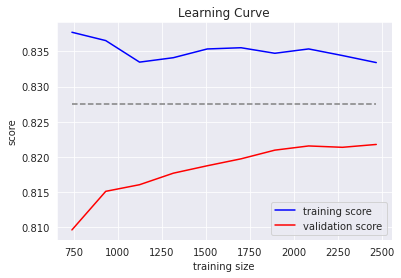

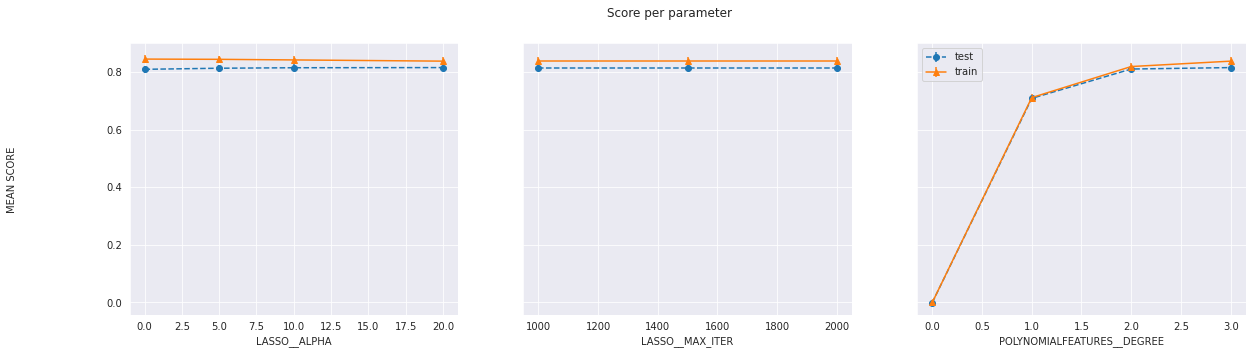

In [9]:
lr_lasso.to_json("dist/result.json")
lr_lasso.display()

# 4- Linear Regression with Lasso Regularization and RFE

In [10]:
lr_lasso_rfe = generate_model_summary(
    "lr_lasso_rfe",
    Lasso(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    rfe={
        "estimator": Ridge(),
    },
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "lasso__alpha": [0, 5, 10, 20],
            "lasso__max_iter": [1000, 1500, 2000],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-packages/sklearn/pipeline.py:382: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/allonios/PycharmProjects/health_insurance_cost_prediction/.venv/lib/python3.10/site-package

Model Result:


MSE  R2 Score
0  Train  1.880430e+07  0.832779
1   Test  1.884652e+07  0.857542

Grid Search Best Params:


param  values
0                lasso__alpha      10
1             lasso__max_iter    1000
2  polynomialfeatures__degree       3

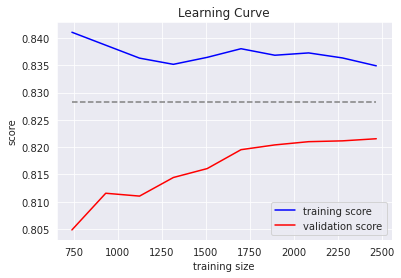

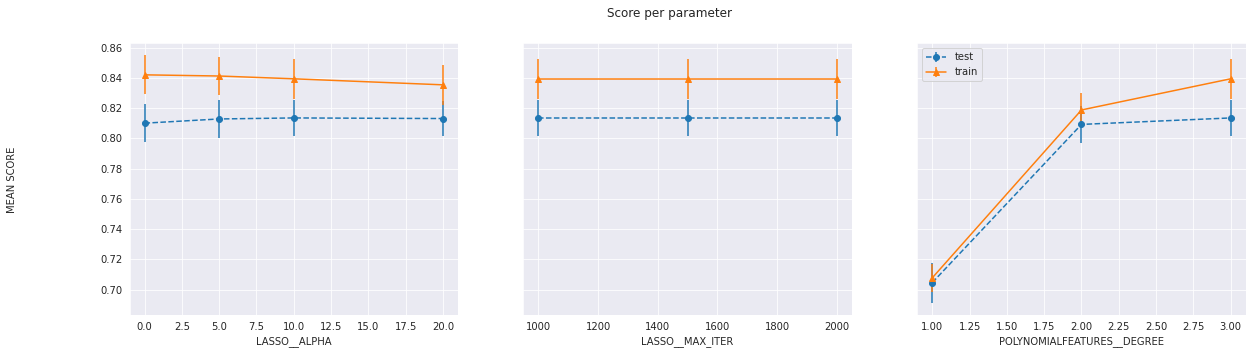

In [11]:
lr_lasso_rfe.to_json("dist/result.json")
lr_lasso_rfe.display()

# 5- DecisionTreeRegressor

In [12]:
decision_tree = generate_model_summary(
    "decision_tree",
    DecisionTreeRegressor(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "decisiontreeregressor__min_samples_leaf": [1, 2, 4, 6, 8],
            "decisiontreeregressor__max_depth": [1, 2, 4, 6, 8],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

Model Result:


MSE  R2 Score
0  Train  1.299324e+07  0.884455
1   Test  1.479267e+07  0.888184

Grid Search Best Params:


param  values
0         decisiontreeregressor__max_depth       6
1  decisiontreeregressor__min_samples_leaf       6
2               polynomialfeatures__degree       1

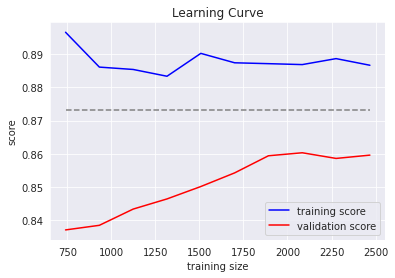

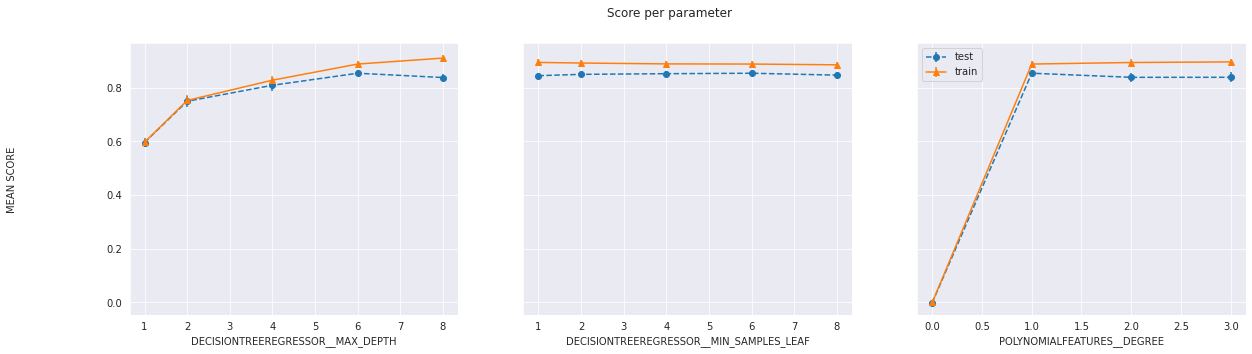

In [13]:
decision_tree.to_json("dist/result.json")
decision_tree.display()

# 6- Linear SVR

In [14]:
linear_svr = generate_model_summary(
    "linear_svr",
    LinearSVR(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "linearsvr__epsilon": [0, 0.5, 1.0, 1.5, 2],
            "linearsvr__C": [0, 1, 5, 20, 50],
            "linearsvr__max_iter": [1000, 1500, 2000],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

Model Result:


MSE  R2 Score
0  Train  2.425196e+07  0.784335
1   Test  2.312766e+07  0.825181

Grid Search Best Params:


param  values
0                linearsvr__C    50.0
1          linearsvr__epsilon     1.5
2         linearsvr__max_iter  1000.0
3  polynomialfeatures__degree     3.0

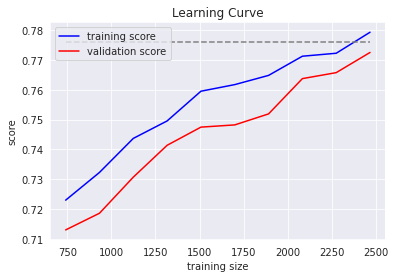

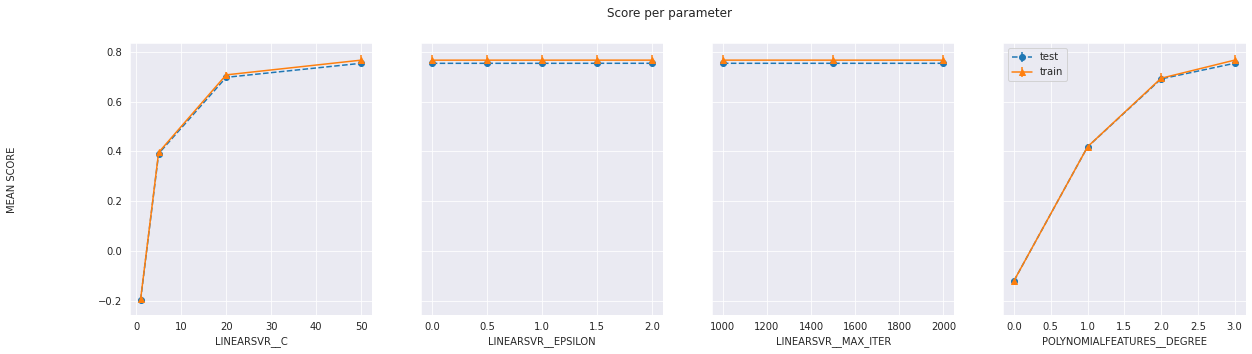

In [15]:
linear_svr.to_json("dist/result.json")
linear_svr.display()

# 6- SVR


In [16]:
svr = generate_model_summary(
    "svr",
    SVR(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "svr__epsilon": [0, 0.5, 1.0, 1.5, 2],
            "svr__degree": [1, 2],
            "svr__gamma": [0.1, 1, 10],
            "svr__C": [0.001, 1, 10, 100],
            "svr__kernel": ["linear", "ploy", "rbf"],
            # "svr__max_iter": [1000, 1500, 2000],
        },
        "n_jobs": 3
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

Model Result:


MSE  R2 Score
0  Train  2.257397e+07  0.799257
1   Test  2.116541e+07  0.840014

Grid Search Best Params:


param  values
0  polynomialfeatures__degree       3
1                      svr__C     100
2                 svr__degree       1
3                svr__epsilon       2
4                  svr__gamma     0.1
5                 svr__kernel  linear

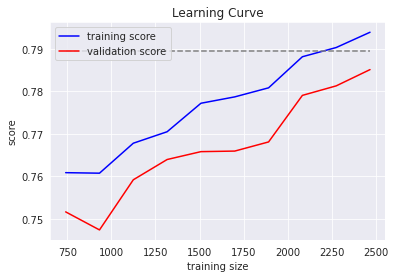

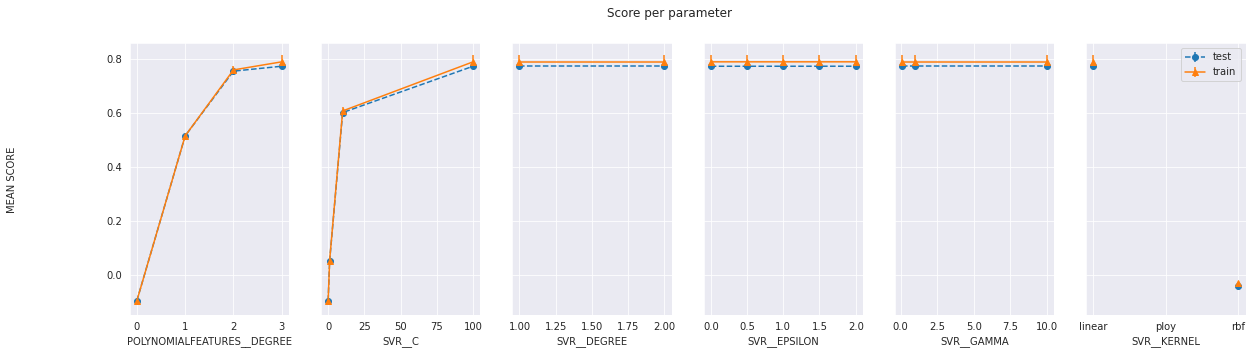

In [17]:
svr.to_json("dist/result.json")
svr.display()

# 7- AdaBoostRegressor with LinearRegression

In [18]:
ada_boost_ridge = generate_model_summary(
    "ada_boost_ridge",
    AdaBoostRegressor(
        Ridge(alpha=5)
    ),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "adaboostregressor__n_estimators": [50, 100, 200],
            "adaboostregressor__learning_rate": [0.001, 0.01],
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

Model Result:


MSE  R2 Score
0  Train  1.816231e+07  0.838488
1   Test  1.822538e+07  0.862237

Grid Search Best Params:


param   values
0  adaboostregressor__learning_rate    0.001
1   adaboostregressor__n_estimators  100.000
2        polynomialfeatures__degree    3.000

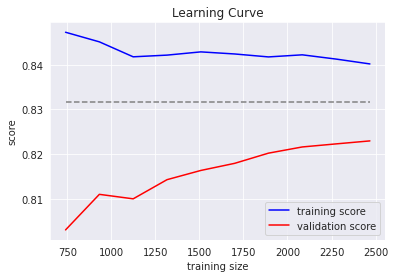

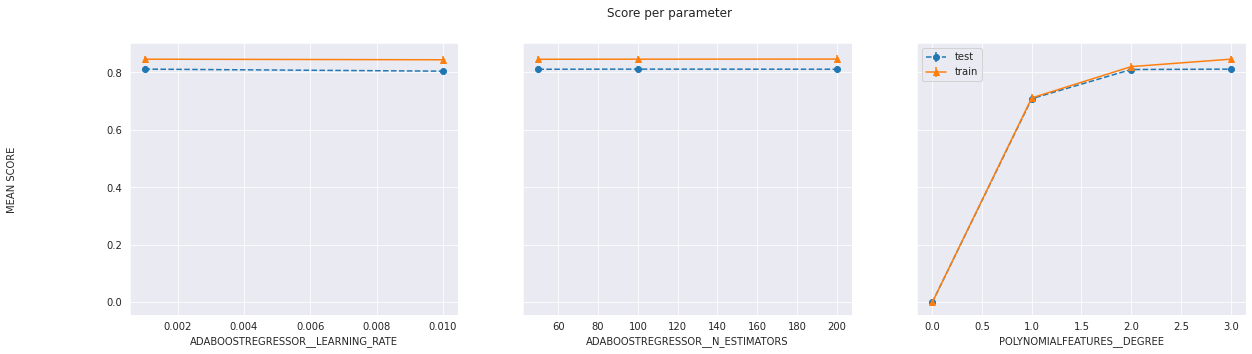

In [19]:
ada_boost_ridge.to_json("dist/result.json")
ada_boost_ridge.display()

# 8- AdaBoostRegressor with DecisionTreeRegressor


In [20]:
ada_boost_tree = generate_model_summary(
    "ada_boost_tree",
    AdaBoostRegressor(
        DecisionTreeRegressor(max_depth=6, min_samples_leaf=6)
    ),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "adaboostregressor__n_estimators": [50, 100, 200],
            "adaboostregressor__learning_rate": [0.001, 0.01],
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

Model Result:


MSE  R2 Score
0  Train  1.208898e+07  0.892496
1   Test  1.401065e+07  0.894095

Grid Search Best Params:


param   values
0  adaboostregressor__learning_rate    0.001
1   adaboostregressor__n_estimators  200.000
2        polynomialfeatures__degree    1.000

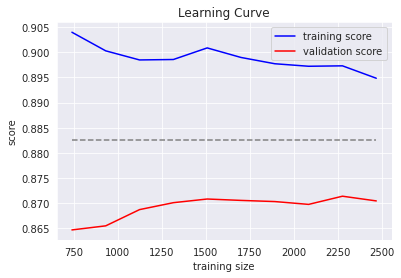

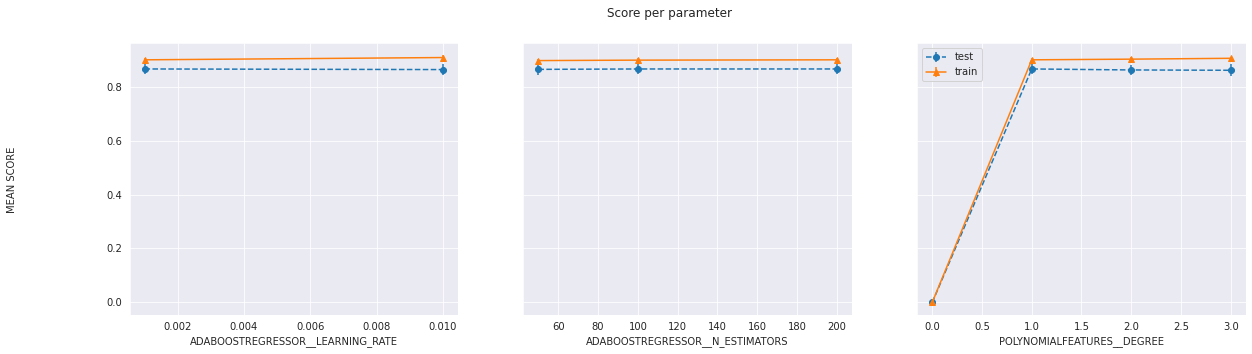

In [21]:
ada_boost_tree.to_json("dist/result.json")
ada_boost_tree.display()

# 9- GradientBoostingRegressor

In [22]:
gradient_boost = generate_model_summary(
    "gradient_boost",
    GradientBoostingRegressor(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "gradientboostingregressor__max_depth": [1, 2, 4, 6, 8],
            "gradientboostingregressor__learning_rate": [0.001, 0.01],
            "gradientboostingregressor__n_estimators": [50, 100, 200],
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

Model Result:


MSE  R2 Score
0  Train  6.706922e+06  0.940357
1   Test  1.356377e+07  0.897473

Grid Search Best Params:


param  values
0  gradientboostingregressor__learning_rate    0.01
1      gradientboostingregressor__max_depth    8.00
2   gradientboostingregressor__n_estimators  200.00
3                polynomialfeatures__degree    2.00

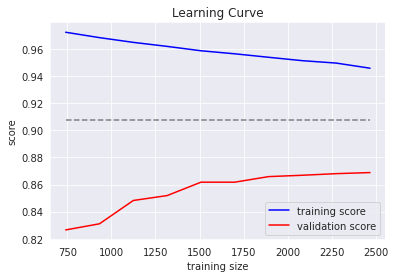

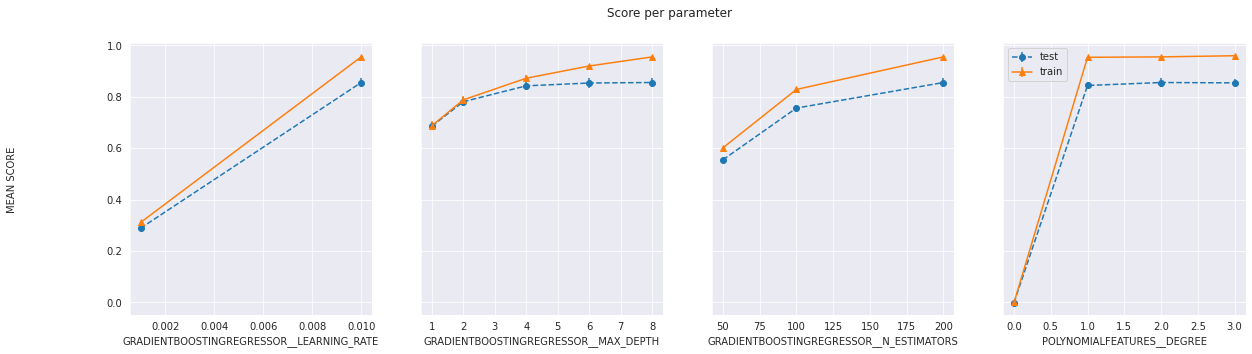

In [23]:
gradient_boost.to_json("dist/result.json")
gradient_boost.display()

# 10- RandomForestRegressor

In [24]:
random_forest = generate_model_summary(
    "random_forest",
    RandomForestRegressor(),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "randomforestregressor__max_leaf_nodes": [4, 8, 16],
            "randomforestregressor__n_estimators": [50, 100, 200],
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

Model Result:


MSE  R2 Score
0  Train  1.350233e+07  0.879928
1   Test  1.415079e+07  0.893036

Grid Search Best Params:


param  values
0             polynomialfeatures__degree       3
1  randomforestregressor__max_leaf_nodes      16
2    randomforestregressor__n_estimators     100

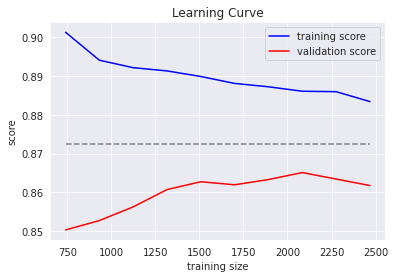

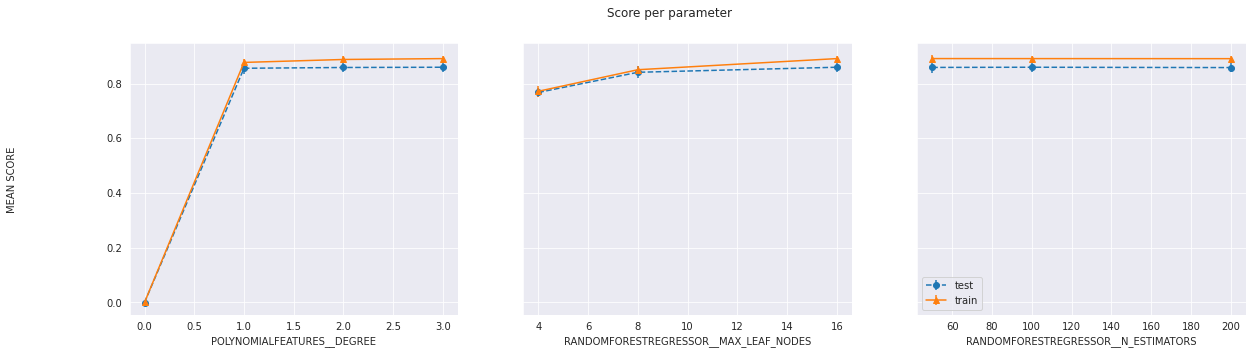

In [25]:
random_forest.to_json("dist/result.json")
random_forest.display()

# 11- VotingRegressor

In [28]:
voting = generate_model_summary(
    "voting",
    VotingRegressor(
        estimators=[
            ("lr", Ridge(alpha=5)),
            ("dt", DecisionTreeRegressor(max_depth=6, min_samples_leaf=6))
        ]
    ),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 3},
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

Model Result:


MSE  R2 Score
0  Train  1.294364e+07  0.884896
1   Test  1.416968e+07  0.892893

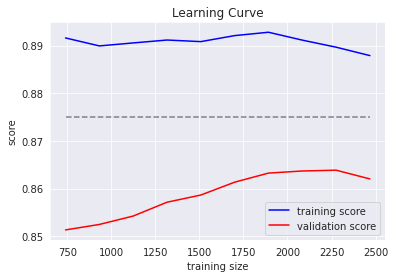

In [30]:
voting.to_json("dist/result.json")
voting.display()

# 12- BaggingRegressor with LinearRegression

In [31]:
bagging_ridge = generate_model_summary(
    "bagging_ridge",
    BaggingRegressor(
        Ridge(alpha=5)
    ),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "baggingregressor__n_estimators": [100, 200, 300],
            "baggingregressor__max_samples": [50, 100],
            # for testing bagging a pasting.
            "baggingregressor__bootstrap": [True, False],
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

Model Result:


MSE  R2 Score
0  Train  2.480193e+07  0.779444
1   Test  2.541173e+07  0.807916

Grid Search Best Params:


param values
0     baggingregressor__bootstrap  False
1   baggingregressor__max_samples    100
2  baggingregressor__n_estimators    200
3      polynomialfeatures__degree      2

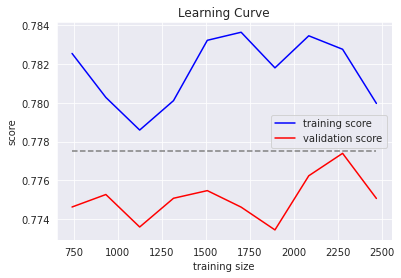

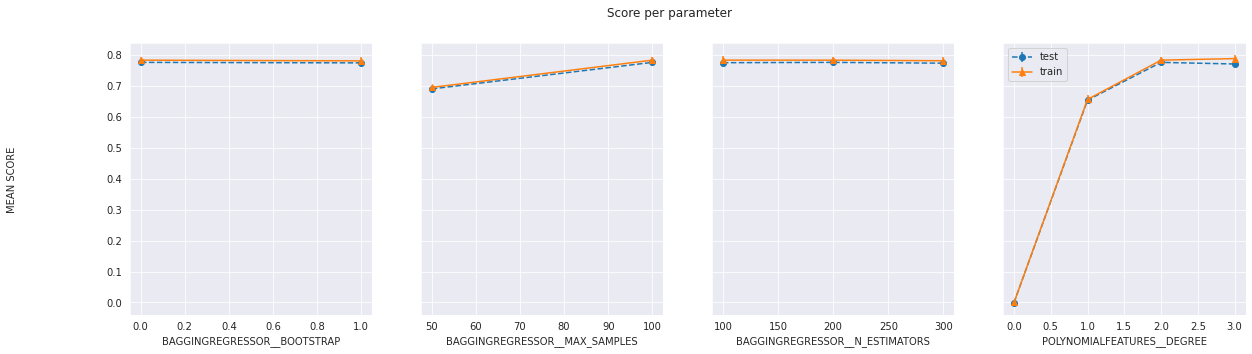

In [32]:
bagging_ridge.to_json("dist/result.json")
bagging_ridge.display()

# 13- Bagging with DecisionTreeRegressor

In [34]:
bagging_tree = generate_model_summary(
    "bagging_tree",
    BaggingRegressor(
        DecisionTreeRegressor(
            max_depth=6, min_samples_leaf=6
        )
    ),
    X_train,
    X_test,
    y_train,
    y_test,
    polynomial_features={"degree": 2},
    grid_search={
        "param_grid": {
            "polynomialfeatures__degree": range(4),
            "baggingregressor__n_estimators": [100, 200, 300],
            "baggingregressor__max_samples": [50, 100],
            # for testing bagging a pasting.
            "baggingregressor__bootstrap": [True, False],
        },
        "n_jobs": 4
    },
    learning_curve={
        "train_sizes": np.linspace(0.3, 1, 10)
    },
)

Model Result:


MSE  R2 Score
0  Train  2.135086e+07  0.810133
1   Test  2.223995e+07  0.831891

Grid Search Best Params:


param values
0     baggingregressor__bootstrap  False
1   baggingregressor__max_samples    100
2  baggingregressor__n_estimators    100
3      polynomialfeatures__degree      2

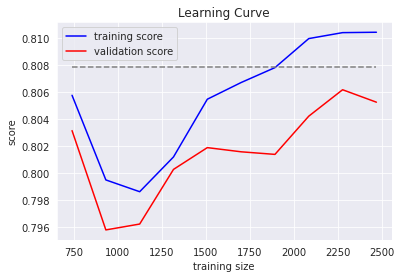

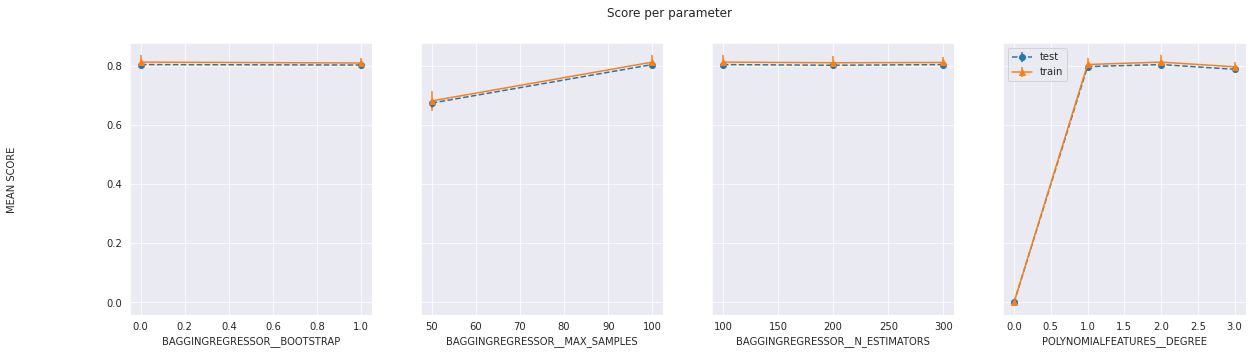

In [35]:
bagging_tree.to_json("dist/result.json")
bagging_tree.display()